In [179]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [180]:
C_M     = 10        # nF/mm^2

### Initial Values
V_INIT  = -65       #mV
M_INIT  = 0.0529
H_INIT  = 0.5961
N_INIT  = 0.3177

### Maximal Conductance
G_L     = 0.003     # mS/mm^2
G_NA    = 1.2       # mS/mm^2
G_K     = 0.36      # mS/mm^2
E_L     = -54.387 # mV
E_K     = -77     # mV
E_NA    = 50      # mV

DT      = 0.01
TOTAL   = 1000

In [234]:
def HudgkinHuxleyModel(I_c2A, T=TOTAL, dt = DT, 
                       V_init=V_INIT, m_init=M_INIT, h_init=H_INIT, n_init=N_INIT,
                       c_m=C_M, g_l=G_L, g_na=G_NA, g_k=G_K, E_l=E_L, E_k=E_K, E_na=E_NA):
    N = int(T/dt)
    V = np.zeros(N);     V[0]=V_init
    i_m = np.zeros(N)
    '''
    alpha_n = np.zero(N); alpha_n[0]=Alpha_N(V_init)
    beta_n = np.zero(N); beta_n[0]=Beta_N(V_init)
    alpha_m = np.zero(N); alpha_m[0]=Alpha_M(V_init)
    beta_m = np.zero(N); beta_m[0]=Beta_M(V_init)
    alpha_h = np.zero(N); alpha_h[0]=Alpha_H(V_init)
    beta_h = np.zero(N); beta_h[0]=Beta_H(V_init)
    '''
    tau_n = np.zeros(N)     
    n_infty = np.zeros(N)  
    tau_m = np.zeros(N)    
    m_infty = np.zeros(N)
    tau_h = np.zeros(N)   
    h_infty = np.zeros(N)  

    n = np.zeros(N);         n[0]=n_init
    m = np.zeros(N);         m[0]=m_init
    h = np.zeros(N);         h[0]=h_init

    for i in range(N-1):
        tau_n[i] = Tau_X(Alpha_N(V[i]), Beta_N(V[i]))
        n_infty[i] = X_Infty(Alpha_N(V[i]), Beta_N(V[i]))
        tau_m[i] = Tau_X(Alpha_M(V[i]), Beta_M(V[i]))
        m_infty[i] = X_Infty(Alpha_M(V[i]), Beta_M(V[i]))
        tau_h[i] = Tau_X(Alpha_H(V[i]), Beta_H(V[i]))
        h_infty[i] = X_Infty(Alpha_H(V[i]), Beta_H(V[i]))

        n[i+1] = n[i] + (dt/tau_n[i])*(n_infty[i]-n[i])
        m[i+1] = m[i] + (dt/tau_m[i])*(m_infty[i]-m[i])
        h[i+1] = h[i] + (dt/tau_h[i])*(h_infty[i]-h[i])

        i_m[i] = (g_l*(V[i]-E_l) + g_k*math.pow(n[i+1],4)*(V[i]-E_k) + g_na*math.pow(m[i+1],3)*h[i+1]*(V[i]-E_na)) * 1000
        V[i+1] = V[i] + (dt/c_m)*(-1*i_m[i] + I_c2A)
        
    t = np.arange(N)*dt
        
    
    return t, V, n, m, h #, tau_n, tau_m, tau_h, n_infty, m_infty, h_infty



def Alpha_N(V):
    if V == -55.0:
        return 0.1
    return 0.01*(V+55)/(1-math.exp(-0.1*(V+55)))

def Beta_N(V):
    return 0.125*math.exp(-0.0125*(V+65))

def Alpha_M(V):
    if V == -40.0:
        return 1.0
    return 0.1*(V+40)/(1-math.exp(-0.1*(V+40)))

def Beta_M(V):
    return 4*math.exp(-0.0556*(V+65))

def Alpha_H(V):
    return 0.07*math.exp(-0.05*(V+65))

def Beta_H(V):
    return 1/(1+math.exp(-0.1*(V+35)))

def Tau_X(Alpha, Beta):
    return 1/(Alpha+Beta)

def X_Infty(Alpha, Beta):
    return Alpha/(Alpha+Beta)
    

a) Use an external current with Ie/A = 200 nA/mm2 and plot V, m, h, and n as functions of time for a suitable interval.

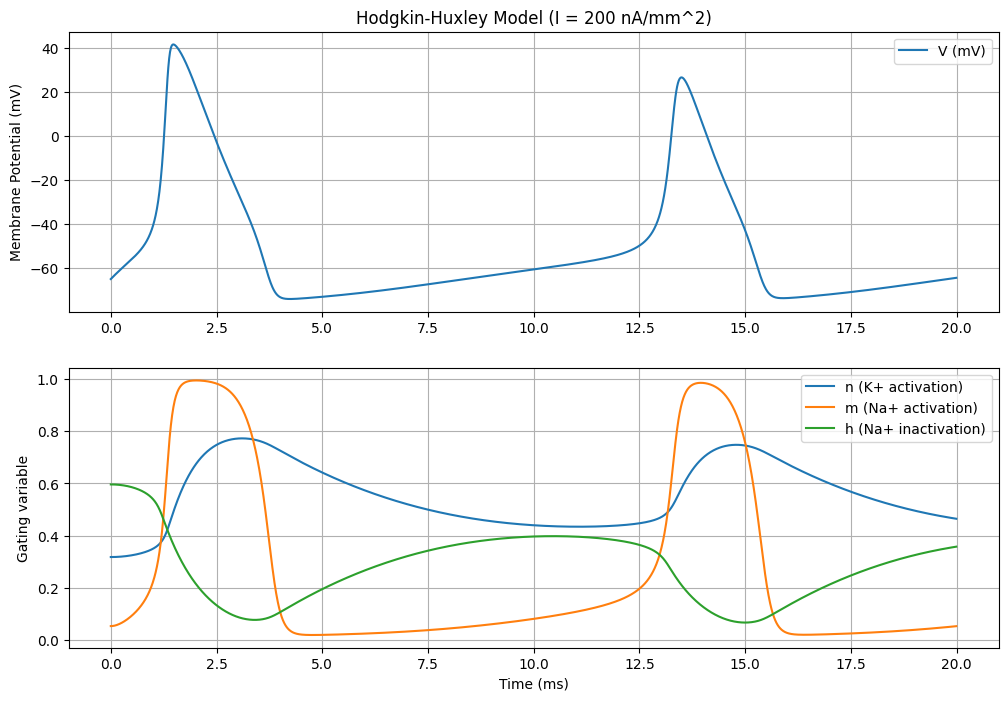

In [198]:
t, V, n, m, h = HudgkinHuxleyModel(200, T=20)

plt.figure(figsize=(12, 8))

plt.subplot(2,1,1)
plt.plot(t, V, label="V (mV)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Hodgkin-Huxley Model (I = 200 nA/mm^2)")
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(t, n, label="n (K+ activation)")
plt.plot(t, m, label="m (Na+ activation)")
plt.plot(t, h, label="h (Na+ inactivation)")
plt.xlabel("Time (ms)")
plt.ylabel("Gating variable")
plt.legend()
plt.grid(True)

plt.show()

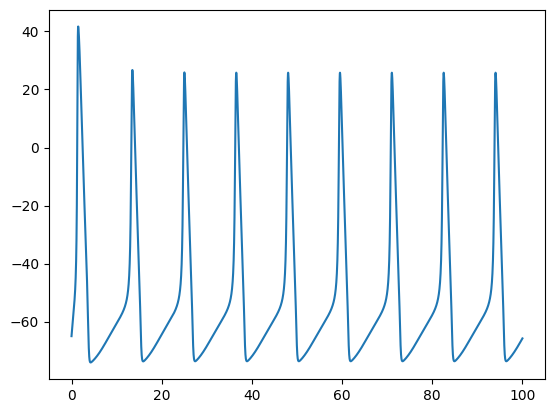

In [183]:
plt.plot(t,V)

b) Plot the firing rate of the model as a function of Ie/A over the range from 0 to 500nA/mm2.

5.0


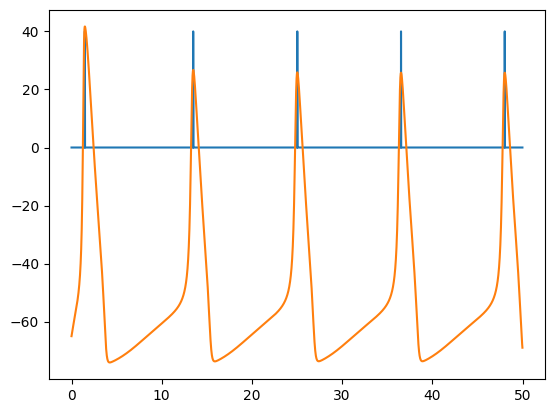

In [200]:
def countSpike(V, T=TOTAL, dt=DT):
    N = int(T/dt)
    r = np.zeros(N)
    
    for i in range(N-2):
        if V[i+1]-V[i] > 0 and V[i+2]-V[i+1] < 0:
            r[i+1] = 1
    
    return r

t, V, n, m, h = HudgkinHuxleyModel(200, T=50)

r = countSpike(V, T=50)

plt.plot(t, r*40)
plt.plot(t, V)
print(r.sum())

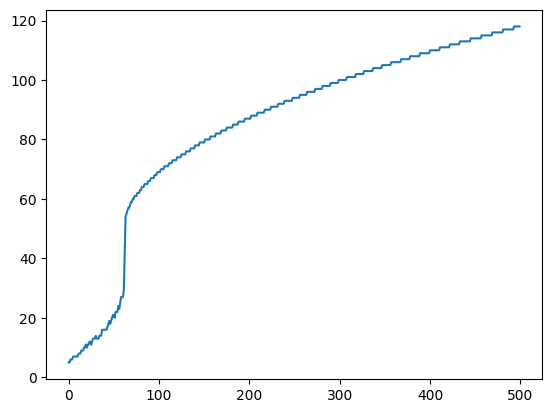

In [185]:
A = np.zeros(500)

for i in range(500):
    t, V, n, m, h = HudgkinHuxleyModel(i, T=1000)
    r = countSpike(V, T=1000)
    
    A[i] = r.sum() 

plt.plot(A)

[]

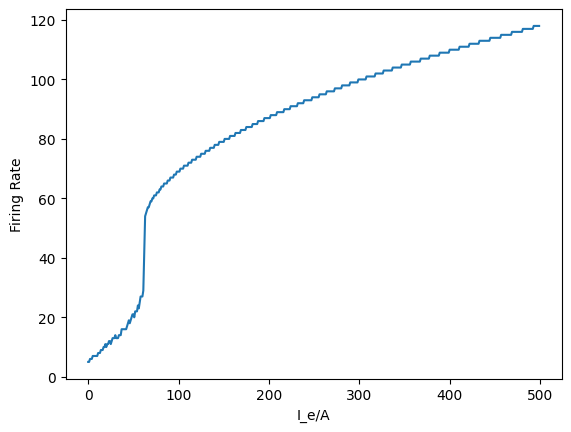

In [188]:
plt.plot(A)
plt.xlabel("I_e/A")
plt.ylabel("Firing Rate")
plt.plot()

c) Apply a pulse of negative current with Ie/A = −50 nA/mm2 for 5 ms followed by Ie/A = 0 and show what happens. Why does this occur?

In [ ]:
def HudgkinHuxleyModelModifyCurrent(I_c2A, T=TOTAL, dt = DT, 
                       V_init=V_INIT, m_init=M_INIT, h_init=H_INIT, n_init=N_INIT,
                       c_m=C_M, g_l=G_L, g_na=G_NA, g_k=G_K, E_l=E_L, E_k=E_K, E_na=E_NA):
    N = int(T/dt)
    V = np.zeros(N);     V[0]=V_init
    i_m = np.zeros(N)

    tau_n = np.zeros(N)     
    n_infty = np.zeros(N)  
    tau_m = np.zeros(N)    
    m_infty = np.zeros(N)
    tau_h = np.zeros(N)   
    h_infty = np.zeros(N)  

    n = np.zeros(N);         n[0]=n_init
    m = np.zeros(N);         m[0]=m_init
    h = np.zeros(N);         h[0]=h_init

    for i in range(N-1):
        tau_n[i] = Tau_X(Alpha_N(V[i]), Beta_N(V[i]))
        n_infty[i] = X_Infty(Alpha_N(V[i]), Beta_N(V[i]))
        tau_m[i] = Tau_X(Alpha_M(V[i]), Beta_M(V[i]))
        m_infty[i] = X_Infty(Alpha_M(V[i]), Beta_M(V[i]))
        tau_h[i] = Tau_X(Alpha_H(V[i]), Beta_H(V[i]))
        h_infty[i] = X_Infty(Alpha_H(V[i]), Beta_H(V[i]))

        n[i+1] = n[i] + (dt/tau_n[i])*(n_infty[i]-n[i])
        m[i+1] = m[i] + (dt/tau_m[i])*(m_infty[i]-m[i])
        h[i+1] = h[i] + (dt/tau_h[i])*(h_infty[i]-h[i])

        i_m[i] = (g_l*(V[i]-E_l) + g_k*math.pow(n[i+1],4)*(V[i]-E_k) + g_na*math.pow(m[i+1],3)*h[i+1]*(V[i]-E_na)) * 1000
        V[i+1] = V[i] + (dt/c_m)*(-1*i_m[i] + I_c2A[i])
        
    t = np.arange(N)*dt
        
    
    return t, V, n, m, h #, tau_n, tau_m, tau_h, n_infty, m_infty, h_infty

In [195]:
Duration = 50
I_c2A = np.zeros(int(Duration/DT))
Pulse_Length = 5            #ms
Pulse_Strength = -50        #nA/mm^2

for i in range(int(Pulse_Length/DT)):
    I_c2A[i]=Pulse_Strength

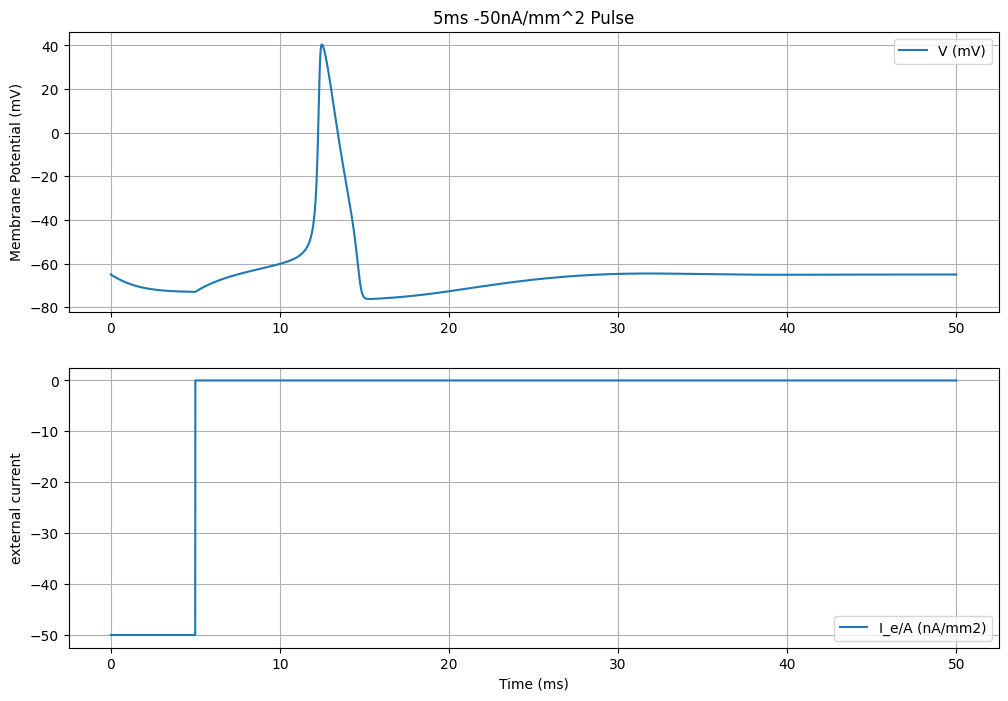

In [197]:
t, V, n, m, h = HudgkinHuxleyModelModifyCurrent(I_c2A, T=Duration)

plt.figure(figsize=(12, 8))

plt.subplot(2,1,1)
plt.plot(t, V, label="V (mV)")
plt.ylabel("Membrane Potential (mV)")
plt.title("5ms -50nA/mm^2 Pulse")
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(t, I_c2A, label="I_e/A (nA/mm2)")
plt.xlabel("Time (ms)")
plt.ylabel("external current")
plt.legend()
plt.grid(True)

plt.show()

## (2) Extend the Hodgkin-Huxley model you built in the previous problem to a multi-compartment model of an axon. Built the axon out of 100 compartments, each of which has a radius of 2 µm and a length of 100 µm. Each compartment should contain the Hodgkin-Huxley conductances used above. Inject a current into the first compartment of the cable suﬃcient to evoke action potentials, or use a pulse to evoke a single action potential. All the other compartments should receive no external current.

### a) What is the propagation speed of the resulting action potential.

In [242]:
# --- 케이블 모델 상수 정의 ---
COMPARTMENT = 100
LENGTH = 0.1        # mm
RADIUS = 0.002      # mm

LONGITUDINAL_RESISTANCE = 1 # kOhm/mm

r_L = LONGITUDINAL_RESISTANCE / (np.pi * RADIUS**2)

g_c = 1 / (r_L * LENGTH)

def HudgkinHuxleyModelCable(I_c2A_pulse, C=COMPARTMENT, R=RADIUS, L=LENGTH, gc=g_c, T=50, dt=DT,
                            V_init=V_INIT, m_init=M_INIT, h_init=H_INIT, n_init=N_INIT,
                            c_m=C_M, g_l=G_L, g_na=G_NA, g_k=G_K, E_l=E_L, E_k=E_K, E_na=E_NA):
    
    N = int(T / dt)
    V = np.zeros((C, N)); V[:, 0] = V_init
    n = np.zeros((C, N)); n[:, 0] = n_init
    m = np.zeros((C, N)); m[:, 0] = m_init
    h = np.zeros((C, N)); h[:, 0] = h_init

    I_ext = np.zeros((C, N))
    pulse_len = I_c2A_pulse.size
    if pulse_len <= N:
        I_ext[0, :pulse_len] = I_c2A_pulse
    else:
        I_ext[0, :] = I_c2A_pulse[:N]

    surface_area = 2 * np.pi * R * L
    compartment_capacitance = c_m * surface_area        # nF/mm^2 * mm^2 = nF

    for i in range(N - 1):
        for j in range(C):
            i_m_density = (g_l * (V[j, i] - E_l) + 
                           g_k * math.pow(n[j, i], 4) * (V[j, i] - E_k) + 
                           g_na * math.pow(m[j, i], 3) * h[j, i] * (V[j, i] - E_na))    # mS/mm^2 * mV = uA/mm^2
            i_m_total = i_m_density * surface_area * 1000                               # uA/mm^2 * mm^2 * 1000 = nA

            V_left = V[j-1, i] if j > 0 else V[j, i]
            V_right = V[j+1, i] if j < C - 1 else V[j, i]

            i_axial_total = (gc * (V_left - V[j, i]) + gc * (V_right - V[j, i])) * 1000 # nA

            I_ext_total = I_ext[j, i] * surface_area                        # nA/mm^2 * mm^2 = nA

            total_current = -i_m_total + i_axial_total + I_ext_total
            V[j, i+1] = V[j, i] + (total_current * dt) / compartment_capacitance

            alpha_n = Alpha_N(V[j, i]); beta_n = Beta_N(V[j, i])
            alpha_m = Alpha_M(V[j, i]); beta_m = Beta_M(V[j, i])
            alpha_h = Alpha_H(V[j, i]); beta_h = Beta_H(V[j, i])
            
            tau_n = Tau_X(alpha_n, beta_n); n_inf = X_Infty(alpha_n, beta_n)
            tau_m = Tau_X(alpha_m, beta_m); m_inf = X_Infty(alpha_m, beta_m)
            tau_h = Tau_X(alpha_h, beta_h); h_inf = X_Infty(alpha_h, beta_h)

            if tau_n == 0 or tau_m == 0 or tau_h == 0:
                n[j, i+1], m[j, i+1], h[j, i+1] = n[j, i], m[j, i], h[j, i]
                continue

            n[j, i+1] = n_inf - (n_inf - n[j, i]) * math.exp(-dt / tau_n)
            m[j, i+1] = m_inf - (m_inf - m[j, i]) * math.exp(-dt / tau_m)
            h[j, i+1] = h_inf - (h_inf - h[j, i]) * math.exp(-dt / tau_h)
            
    t = np.arange(N) * dt
    return t, V, n, m, h

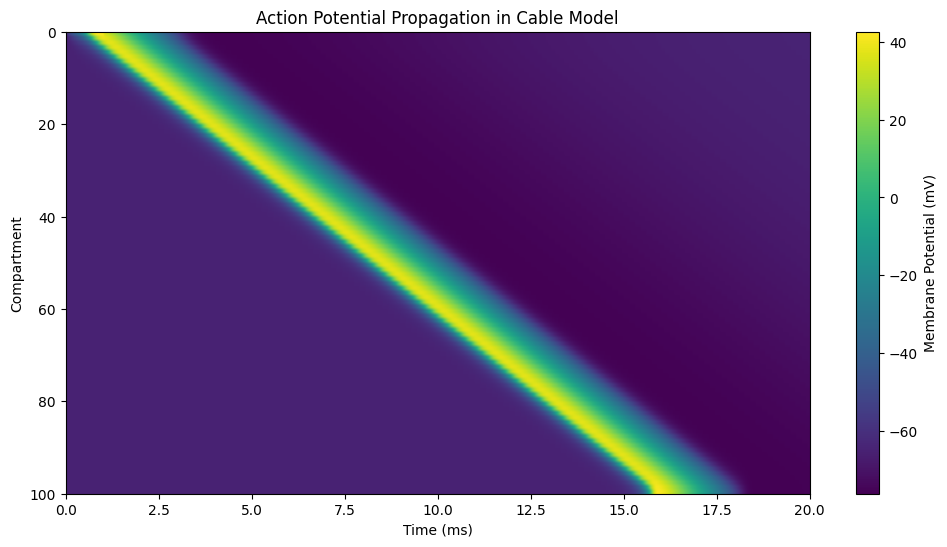

In [ ]:
sim_time = 20
time_steps = int(sim_time/DT)
I_app_pulse = np.zeros(time_steps)
pulse_steps = int(1/DT)
I_app_pulse[0:pulse_steps] = 2000

t, V, n, m, h = HudgkinHuxleyModelCable(I_app_pulse, T=sim_time)

plt.figure(figsize=(12, 6))
plt.imshow(V, extent=[0, sim_time, COMPARTMENT, 0], aspect='auto', cmap='viridis')
plt.colorbar(label='Membrane Potential (mV)')
plt.xlabel('Time (ms)')
plt.ylabel('Compartment')
plt.title('Action Potential Propagation in Cable Model')
plt.show()

In [244]:
def calculate_propagation_speed(V, dt, L, start_comp=20, end_comp=80, threshold=0):
    num_compartments = V.shape[0]
    peak_indices = np.argmax(V > threshold, axis=1)
    time_start = peak_indices[start_comp] * dt
    time_end = peak_indices[end_comp] * dt
    delta_t = time_end - time_start
    delta_d = (end_comp - start_comp) * L
    speed = delta_d / delta_t
    
    return speed

In [247]:
calculate_propagation_speed(V, DT, LENGTH)

np.float64(0.6479481641468682)

b) Change the cable radius to 20 µm. What is the propagation speed now? Show
that the velocities you get in a and b are proportional to the square-root of the axon
radius.

반경에 따른 전파 속도 계산을 시작합니다...
안정성을 위해 작은 시간 간격(dt=0.001ms)을 사용합니다.
Radius: 2.0 µm, Speed: 0.66 m/s
Radius: 2.0 µm, Speed: 0.66 m/s
Radius: 4.0 µm, Speed: 0.94 m/s
Radius: 4.0 µm, Speed: 0.94 m/s
Radius: 6.0 µm, Speed: 1.16 m/s
Radius: 6.0 µm, Speed: 1.16 m/s
Radius: 8.0 µm, Speed: 1.34 m/s
Radius: 8.0 µm, Speed: 1.34 m/s
Radius: 10.0 µm, Speed: 1.50 m/s
Radius: 10.0 µm, Speed: 1.50 m/s
Radius: 12.0 µm, Speed: 1.64 m/s
Radius: 12.0 µm, Speed: 1.64 m/s
Radius: 14.0 µm, Speed: 1.77 m/s
Radius: 14.0 µm, Speed: 1.77 m/s
Radius: 16.0 µm, Speed: 1.89 m/s
Radius: 16.0 µm, Speed: 1.89 m/s
Radius: 18.0 µm, Speed: 2.01 m/s
Radius: 18.0 µm, Speed: 2.01 m/s
Radius: 20.0 µm, Speed: 2.12 m/s
계산 완료.
Radius: 20.0 µm, Speed: 2.12 m/s
계산 완료.


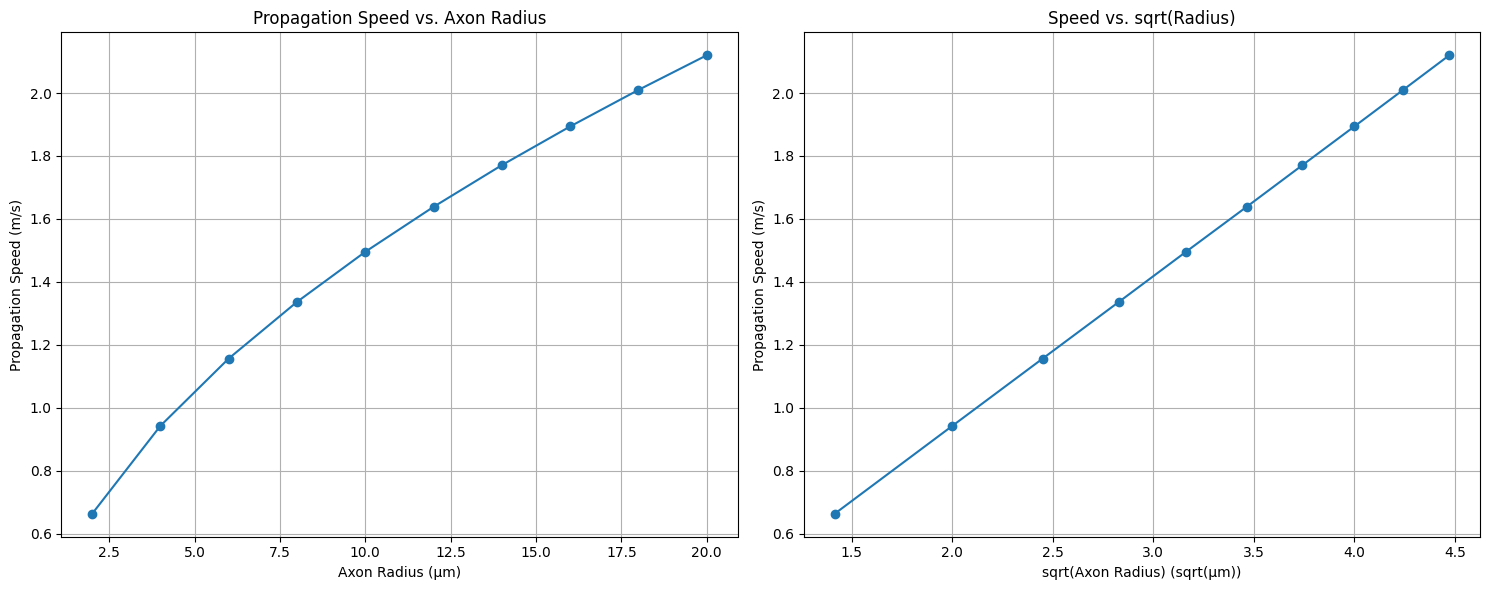

In [ ]:
radii_to_test = np.linspace(0.002, 0.02, 10)
calculated_speeds = []

dt_stable = 0.001
sim_time = 20
time_steps = int(sim_time / dt_stable)
I_app_pulse = np.zeros(time_steps)
pulse_steps = int(1 / dt_stable) 
I_app_pulse[0:pulse_steps] = 2000 

for r_val in radii_to_test:
    r_L_new = LONGITUDINAL_RESISTANCE / (np.pi * r_val**2)
    g_c_new = 1 / (r_L_new * LENGTH)
    
    t, V, n, m, h = HudgkinHuxleyModelCable(I_app_pulse, R=r_val, gc=g_c_new, T=sim_time, dt=dt_stable)
    
    speed = calculate_propagation_speed(V, dt_stable, LENGTH)
    calculated_speeds.append(speed)
    print(f"Radius: {r_val*1000:.1f} µm, Speed: {speed:.2f} m/s")

print("Complete")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

radii_um = radii_to_test * 1000
ax1.plot(radii_um, calculated_speeds, 'o-')
ax1.set_xlabel("Axon Radius (µm)")
ax1.set_ylabel("Propagation Speed (m/s)")
ax1.set_title("Propagation Speed vs. Axon Radius")
ax1.grid(True)

sqrt_radii_um = np.sqrt(radii_um)
ax2.plot(sqrt_radii_um, calculated_speeds, 'o-')
ax2.set_xlabel("sqrt(Axon Radius) (sqrt(µm))")
ax2.set_ylabel("Propagation Speed (m/s)")
ax2.set_title("Speed vs. sqrt(Radius)")
ax2.grid(True)

plt.tight_layout()
plt.show()